# Visualizations

Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

In [2]:
from requests import get

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Visualizations

Visualizations can help us look at summaries of the data. They can also aid in providing good presentation aids.

In this section, we'll look at a few basic types of visualizations such as histograms and bar plots. In practice, there are many more types of visualizations. Furthermore, there are many different packages that can help you create these different visualizations. While we'll focus only on the basics here with the `matplotlib` package, keep in mind that there are many tools available.

Let's start by bringing in some data that we can make plots with.

In [3]:
data_file = '201807-CAH_PulseOfTheNation_Raw.csv'
df = pd.read_csv(data_file)
df.head()

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
0,Female,55,55-64,Independent,NaN,NaN,Moderate,Some college,White,NaN,...,Yes,Strongly Agree,Strongly Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,Yes
1,Female,34,25-34,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Strongly Disagree,Strongly Disagree,Well-informed,No,No,Yes,Help Democrats more,No,DK/REF
2,Male,49,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,DK/REF,Strongly Agree,Somewhat Agree,Well-informed,No,No,Yes,DK/REF,Yes,No
3,Male,41,35-44,Independent,NaN,NaN,Strong Conservative,High school or less,White,NaN,...,Yes,Strongly Agree,Strongly Agree,Not Very Well-informed,Yes,Yes,DK/REF,Make no Difference,Yes,No
4,Female,65,65+,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,Yes


## Review: Making a Histogram
We'll start with a basic histogram. A histogram is useful for looking at the distribution of a numerical variable (that is, a variable that takes numbers as its values as opposed to categories). They can visually represent the spread and center of the variable, as well as provide insights to the shape of the distribution. For example, we can look at the number of **modes**, or peaks, in the data, which wouldn't be captured in numerical summaries such as mean or variance. We can also get a better idea of the **skew** of the data, determining whether most units are grouped on the left or right side (lower or higher values), or whether it's mostly symmetrical. 

<font color ='red'>**Question 1: Create a basic histogram of the `age` variable using the `.hist()` method.**</font>

<Axes: >

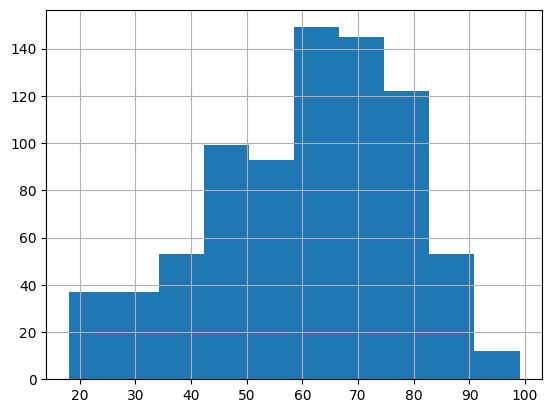

In [4]:
df.age.hist()

Thus far, we have only made histograms with the default values. For example, we used just the default number of bins. We can adjust these using some additional parameters.

In [ ]:
df.age.hist(bins = 20)

We can also make other adjustments, such as the figure size using the `figsize` argument. We use a tuple to indicate the dimensions of the figure in inches.

In [ ]:
df.age.hist(bins = 20, figsize = (8, 6))

### Other Graphs

Here is a table of other graphs we have used so far, along with the situations you would want to use them in. 

|Graph|Method|When to Use|
|-|-|-|
|Histogram|`.hist()`|One numerical variable|
|Boxplot|`.plot.box()`|One numerical variable|
|Bar Plot|`.plot.bar()` or `.plot.barh()`|One or more categorical variable(s)|
|Line Plot|`.plot.line()`|One numerical variable with one sequential variable (like time)|
|Scatter Plot|`.plot.scatter()`|Two numerical variables|

<font color ='red'>**Question 2: Use a visualization to describe the `age_range` variable. What age range had the most respondents?**</font>

## Using matplotlib

These figures are generally quite quick to make, but aren't necessarily always "presentation-ready". That is, though they might be useful to look at distributions or get an idea of what the data looks like, they aren't quite polished enough to use in a report or presentation to other people. Look back at the histograms that we created. There are no labels on the axes, nor is there a title. If we had just shown this graph to someone, they would not know what it was about. Furthermore, there might be other cosmetic changes we might want to make, such as resizing, adding more descriptive text, and so on.

The matplotlib package is the primary tool for data visualization in Python. It allows for lots of customizability, and though there are many other packages that can create visualizations, it is still very commonly used. 

Now, what if we want to make this look nicer using matplotlib, maybe by adding some labels or adjusting the visualization in other ways? We can do that using the Figure and Axes objects. Let's look an example.

In [ ]:
fig, axes = plt.subplots(figsize=(8,6))
df.age.hist(bins=20, range=[0,100])
axes.set_xlabel("Age")
axes.set_ylabel("Frequency")
axes.set_title("Age of Pulse of the Nation Respondents")

Let's break down each line of the code. First, we used the command 

`fig, axes = plt.subplots(figsize=(8,6))`.

This is where we intialize our plot, essentially setting up the space that we'll be working in. It creates a **Figure** object (`fig`) and an **Axes** object (`axes`). The Figure is the window in which we'll create our plot. In this case, we use the `figsize` argument to set the length and height to 8 and 6 inches, respectively. The Axes are the area around the figure, where the tick labels and titles are. 

Then, we plot the figure by taking the pandas Series and using the `plot()` method. We limit the number of bins as well as set the range of the x-axis. 

After that, we use the `ax` object to add labels around the figure, using the `set_xlabel()` and `set_title()` methods. These methods change the axes and add the labels so that they will be displayed. In other worrds, we are able to adjust things about the graph by using the Figure and Axes objects. 

<font color ='red'>**Question 3: Use a visualization to describe the `age_range` variable again. Add x-axis and y-axis labels, as well as a title.**</font>

## Saving Figures

You can use the `.savefig()` method to save any figures that you create as well. This can be useful if you are using the figures elsewhere. 

In [ ]:
fig.savefig("age.png", dpi=400)

<font color ='red'>**Question 4: Save the figure from Question 3.**</font>

## Multiple Graphs

Suppose you wanted to compare the age distribution for liberals and for conservatives. It seems to be generally accepted that older people tend to be more conservative, but this might not hold for the people in this survey. To see what it looks like for our dataset, we can use histograms split by group. 

To do this, we'll first create the two subsets of data. Remember that the `political_leaning` variable doesn't quite split by "Liberal" and "Conservative", so we need to make sure we catch people who answered various types of "Liberal" or "Conservative".

In [ ]:
df.political_leaning.value_counts()

We use the `str.contains` method to catch all who answered some form of "Liberal" and all who answered some form of "Conservative". 

In [ ]:
liberal = df[df.political_leaning.str.contains('Liberal')]
conservative = df[df.political_leaning.str.contains('Conservative')]

In [ ]:
liberal.shape

In [ ]:
conservative.shape

Next, we start by creating the `fig` and `axes` objects, then adding the histograms for each **on the same axes.** This is done by specifying the same Axes for the `ax` argument in each histogram. 

In [ ]:
fig, axes = plt.subplots(figsize=(8,6))
liberal.age.hist(ax = axes)
conservative.age.hist(ax = axes)

Let's try making this look nicer. For one, the histograms layer on top of each other, so it's hard to see what each distribution looks like. Let's make each graph slightly transparent using the `alpha` argument (this is a value from 0 to 1 which sets how transparent it is). Additionally, we'll add the `label` argument for each graph, which will allow us to add a legend at the end. Finally, as before, we'll add a title and axes labels so that it is easier to see what is going on.

In [ ]:
fig, axes = plt.subplots(figsize=(8,6))
liberal.age.hist(ax = axes, alpha = 0.7, label = "Liberal")
conservative.age.hist(ax = axes, alpha = 0.7, label = "Conservative")
axes.set_ylabel("Frequency")
axes.set_xlabel("Age")
axes.set_title('Age of Liberals vs Conservatives in Pulse of the Nation survey')
axes.legend()

This makes it much easier to see which graph corresponds to which group, and compare the age distributions for the two groups. However, we are using the default bins and bin widths, meaning we don't quite have the bins lining up between the two graphs. We can fix this by using the same bins for each of these two graphs. Instead of providing the numbers of bins, we can instead provide a range of numbers that indicate the limits of each of the bins. We'll provide that range of numbers as an argument to `bins` for both histograms.

In [ ]:
fig, axes = plt.subplots(figsize=(8,6))
bins = range(0,100,5)
liberal.age.hist(ax = axes, alpha = 0.7,bins=bins, label = "Liberal")
conservative.age.hist(ax = axes, alpha = 0.7,bins=bins, label = "Conservative")
axes.set_ylabel("Frequency")
axes.set_xlabel("Age")
axes.set_title('Age of Liberals vs Conservatives in Pulse of the Nation survey')
axes.legend()

## Plotting Multiples

If we wanted to look at multiple graphs at the same time, we can create multiple `subplots` with matplotlib to put them together. This creates different axes that you can then add graphs to. Here, we show an example with two graphs. 

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (9,3))
df.age.hist(ax = axes[0], bins = 25)
df.gender.value_counts().plot.bar(ax=axes[1])

Note that we use `1` for the first argument to indicate number of rows, and `2` for the second argument to indicate number of columns. If we had swapped them, we'd see two graphs stacked on top of each other. This might be useful for comparing two distributions, for example.

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (9,7))
liberal.age.hist(ax = axes[0])
axes[0].set_title('Ages of Liberal Respondents')
conservative.age.hist(ax = axes[1])
axes[1].set_title('Ages of Conservative Respondents')

<font color ='red'>**Question 5: Create side by side boxplots of the age distribution of liberals vs conservatives.**</font>

You can also use a 2 by 2 grid. This means you need to use two sets of brackets to access each of the Axes objects. Here, we show an example of combining multiple graphs of the demographic information from the Pulse of the Nation dataset. It combines numerical and categorical data into multiple graphs that are put into one overall image that can then be downloaded and put into other documents. 

Note that the `tick_params` method is used to rotate the labels for the bar graphs so that they are more readable. In addition, we use the `set_title` method with each of the axes objects to add titles for each individual plot, then add an overall title to the Figure by using the `suptitle` method. 

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10,8))

df.age.hist(ax = axes[0][0], bins = 25)
axes[0][0].set_title('Age of Respondents')

df.gender.value_counts().plot.bar(ax=axes[0][1])
axes[0][1].tick_params(axis='x', labelrotation = 0)
axes[0][1].set_title('Gender of Respondents')

df.race.value_counts().plot.bar(ax=axes[1][0])
axes[1][0].tick_params(axis='x', labelrotation = 45)
axes[1][0].set_title('Race of Respondents')

df.education.value_counts().plot.bar(ax=axes[1][1])
axes[1][1].tick_params(axis='x', labelrotation = 45)
axes[1][1].set_title('Education Level of Respondents')

fig.suptitle('Demographics for the Pulse of the Nation dataset')

Note that there's a lot of code here! We did put it together piece by piece, but the level of customization that matplotlib provides means that we can quickly accumulate lots of lines of code to get exactly the type of figure that we want. There's many more settings than this that you can play with too. We'll go over some more in the next few weeks, but as long as you understand the general structure of how Figure and Axis objects work, you should be well-prepared to navigate how to work with and adjust your graphs as needed.